### 7.1.2. Diabetes Dataset

Ten baseline variables, including age, sex, body mass index, average blood pressure, and six blood serum measurements, were obtained for each of n = 442 diabetes patients. The dataset also includes the response of interest, which is a quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

- **Number of Instances:** 442
- **Number of Attributes:** First 10 columns are numeric predictive values
- **Target:** Column 11 is a quantitative measure of disease progression one year after baseline

**Attribute Information:**

- **age:** Age in years
- **sex:** Sex
- **bmi:** Body mass index
- **bp:** Average blood pressure
- **s1:** TC, total serum cholesterol
- **s2:** LDL, low-density lipoproteins
- **s3:** HDL, high-density lipoproteins
- **s4:** TCH, total cholesterol / HDL
- **s5:** LTG, possibly log of serum triglycerides level
- **s6:** GLU, blood sugar level

*Note:* Each of these 10 feature variables has been mean-centered and scaled by the standard deviation times the square root of n_samples (i.e., the sum of squares of each column totals 1).

**Source URL:** [Diabetes Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

For more information, see: Bradley Efron, Trevor Hastie, Iain Johnstone, and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. [Read the paper](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [70]:
df = pd.DataFrame(load_diabetes(as_frame=True).frame)

In [71]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [73]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


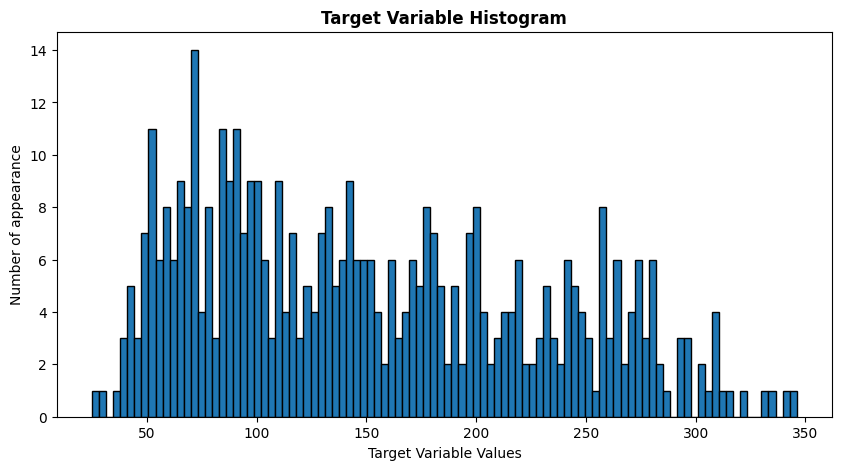

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Target Variable Histogram", fontweight="bold")

n, bins, patches = ax.hist(df.target, color="#1f77b4", ec='black', align="mid", bins=100)

ax.set_xlabel("Target Variable Values")
ax.set_ylabel("Number of appearance")

plt.show()

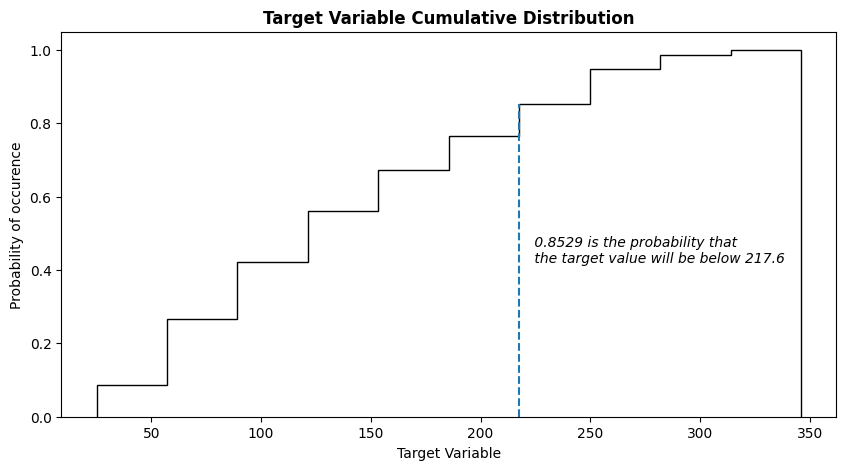

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

offset = 5

ax.set_title("Target Variable Cumulative Distribution", fontweight="bold")

n, bins, patches = ax.hist(df.target, color="#ff7f0e", ec='black', align="mid", histtype="step",  density=True, cumulative=True)

ax.set_xlabel("Target Variable")
ax.set_ylabel("Probability of occurence")

ax.vlines(bins[6], 0, n[6], linestyles="--")
ax.text(bins[6] + offset, n[2], f" {round(n[6], 4)} is the probability that\n the target value will be below {round(bins[6], 2)}",
        fontstyle="italic")

plt.show()

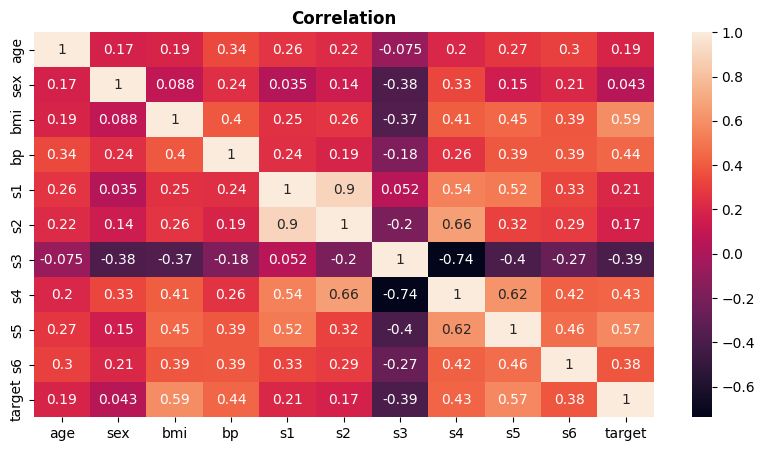

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Correlation", fontweight="bold")
sns.heatmap(df.corr(), annot=True)
plt.show()

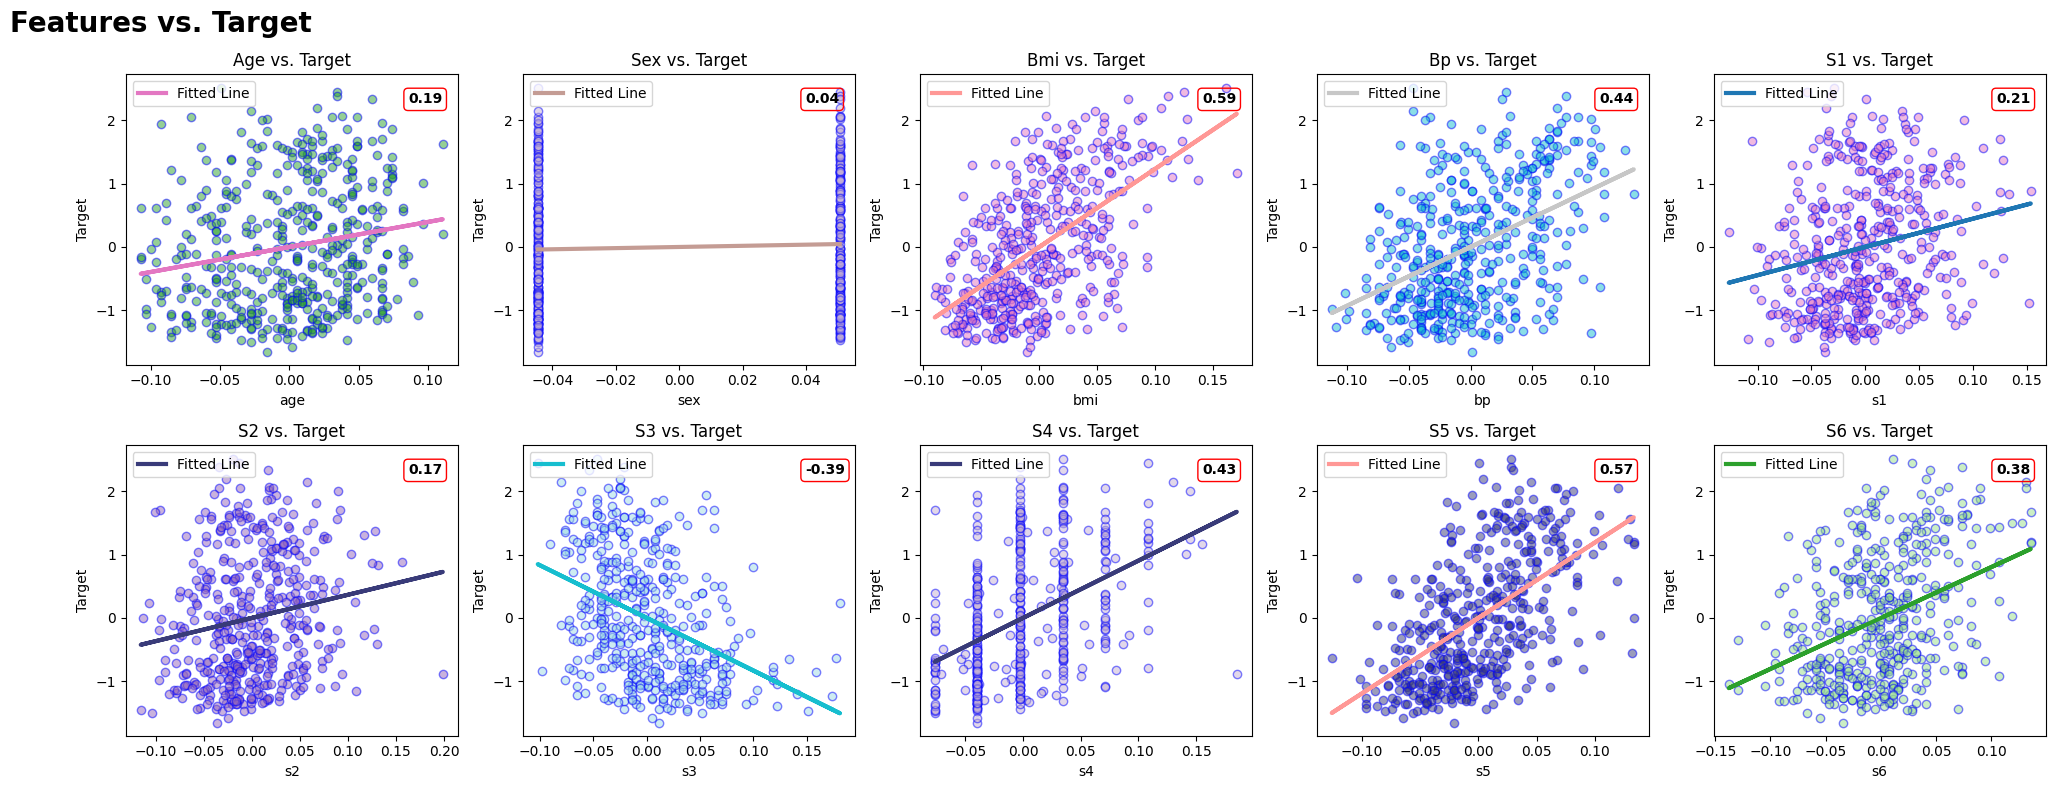

In [77]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
colors_collection = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#393b79", "#ff9896", "#98df8a", "#ffbb78", "#c49c94", "#f7b6d2", "#c5b0d5", "#dbdb8d", "#9edae5", "#c7c7c7"]

axs = axs.flatten()
standardised_target = (df.target - df.target.mean()) / df.target.std()

for idx, ax in enumerate(axs):
    ax.set_title(f"{df.columns[idx].capitalize()} vs. Target")
    ax.scatter(df[f"{df.columns[idx]}"], standardised_target, c=random.choice(colors_collection), edgecolor="b",
               alpha=0.5)
    ax.set_xlabel(f"{df.columns[idx]}")
    ax.set_ylabel("Target")
    beta, residuals, rank, s = np.linalg.lstsq(df[[f"{df.columns[idx]}"]], standardised_target, rcond=None)
    ax.plot(df[[f"{df.columns[idx]}"]], np.array(df[[f"{df.columns[idx]}"]]).dot(beta), color=random.choice(colors_collection), 
            linestyle="-", label="Fitted Line", linewidth=3)

    ax.text(.85, .90, round(df[[f"{df.columns[idx]}"] + ["target"]].corr().iloc[0, 1], 2), transform=ax.transAxes,
            fontweight="bold",  bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'))
    
    ax.legend(loc="upper left")

fig.suptitle('Features vs. Target', fontweight="bold", x=0.05, fontsize=20)
plt.tight_layout()
plt.show()

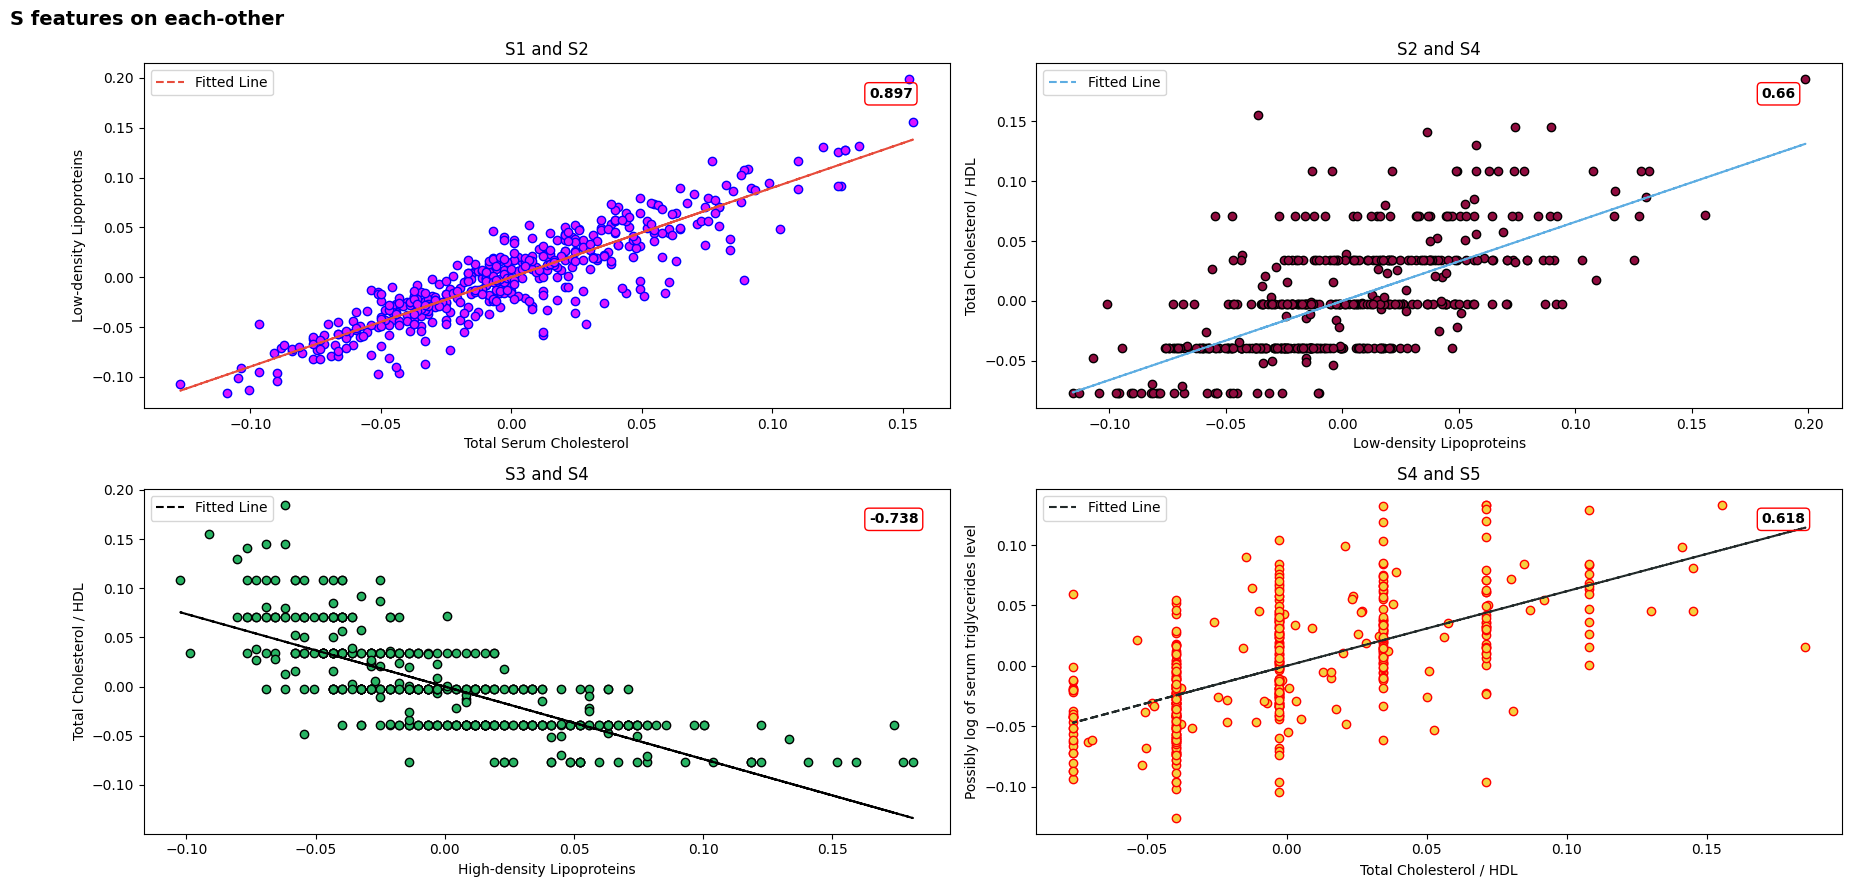

In [78]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))

ax = ax.flatten()

ax[0].set_title("S1 and S2")
ax[0].scatter(df.s1, df.s2, c="#DA16FF", edgecolor="b")
ax[0].set_xlabel("Total Serum Cholesterol")
ax[0].set_ylabel("Low-density Lipoproteins")
beta, residuals, rank, s = np.linalg.lstsq(df[["s1"]], df[["s2"]], rcond=None)
ax[0].plot(df.s1, np.array(df[["s1"]]).dot(beta), color="#E74C3C", linestyle="--", label="Fitted Line")
ax[0].text(.90, .90, round(df[["s1", "s2"]].corr().iloc[0, 1], 3), transform=ax[0].transAxes,
        fontweight="bold",  bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'))

ax[1].set_title("S2 and S4")
ax[1].scatter(df.s2, df.s4, c="#900C3F", edgecolor="black")
ax[1].set_xlabel("Low-density Lipoproteins")
ax[1].set_ylabel("Total Cholesterol / HDL")
beta, residuals, rank, s = np.linalg.lstsq(df[["s2"]], df[["s4"]], rcond=None)
ax[1].plot(df.s2, np.array(df[["s2"]]).dot(beta), color="#5DADE2", linestyle="--", label="Fitted Line")
ax[1].text(.90, .90, round(df[["s2", "s4"]].corr().iloc[0, 1], 3), transform=ax[1].transAxes,
        fontweight="bold",  bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'))


ax[2].set_title("S3 and S4")
ax[2].scatter(df.s3, df.s4, c="#28B463", edgecolor="black")
ax[2].set_xlabel("High-density Lipoproteins")
ax[2].set_ylabel("Total Cholesterol / HDL")
beta, residuals, rank, s = np.linalg.lstsq(df[["s3"]], df[["s4"]], rcond=None)
ax[2].plot(df.s3, df[["s3"]].to_numpy().dot(beta), color="#000000", linestyle="--", label="Fitted Line")
ax[2].text(.90, .90, round(df[["s3", "s4"]].corr().iloc[0, 1], 3), transform=ax[2].transAxes,
        fontweight="bold",  bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'))

ax[3].set_title("S4 and S5")
ax[3].scatter(df.s4, df.s5, c="#F4D03F", edgecolor="r")
ax[3].set_xlabel("Total Cholesterol / HDL")
ax[3].set_ylabel("Possibly log of serum triglycerides level")
beta, residuals, rank, s = np.linalg.lstsq(df[["s4"]], df[["s5"]], rcond=None)
ax[3].plot(df.s4, df[["s4"]].to_numpy().dot(beta), color="#222A2A", linestyle="--", label="Fitted Line")
ax[3].text(.90, .90, round(df[["s4", "s5"]].corr().iloc[0, 1], 3), transform=ax[3].transAxes,
        fontweight="bold",  bbox=dict(facecolor='none', edgecolor='red', boxstyle='round'))
 
ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")
ax[2].legend(loc="upper left")
ax[3].legend(loc="upper left")

fig.suptitle("S features on each-other", fontweight="bold", fontsize=14, x=0.05)
plt.tight_layout()
plt.show()

## Findings

### Target Variable Analysis:
- **Mean:** 152.13
- **Standard Deviation:** 77.09
- **Distribution Insight:** Approximately 85.29% of patients have a diabetes progression value below 217.6.

### Feature Analysis:
- **Scaling Status:** Features are already scaled.
- **Correlation with Target Variable:** 
  - Moderate to strong correlation observed with Body Mass Index (BMI), Average Blood Pressure (BP), and LTG (Laminate Thickness Gradient).
- **Inter-feature Correlations:**
  - Strong correlations identified among S features such as Total Serum Cholesterol (TC), Low-Density Lipoprotein (LDL), High-Density Lipoprotein (HDL), Total Cholesterol/High-Density Lipoprotein ratio (TCH), Possibly log of serum Triglycerides level(LTG), and Blood Sugar Level (GLU).

## Next Steps:
1. Standardize the target variable to achieve zero mean and unit variance.
2. Conduct Principal Component Analysis (PCA) on both the S features and the entire feature set.
3. Evaluate the performance of Linear Regression, Lasso, and Ridge Regression models.


## Standardize Target Variable

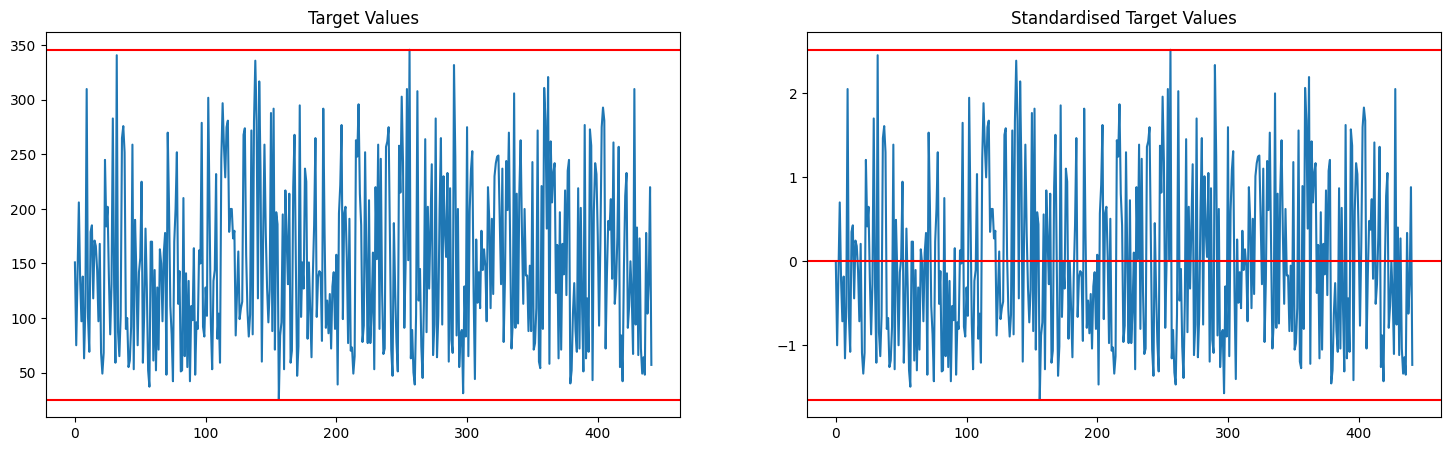

In [79]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 5))

ax[0].plot(df.target)
ax[0].axhline(np.min(df.target), color="r")
ax[0].axhline(np.max(df.target), color="r")

ax[1].plot(standardised_target)
ax[1].axhline(np.min(standardised_target), color="r")
ax[1].axhline(0, color="r")
ax[1].axhline(np.max(standardised_target), color="r")

ax[0].set_title("Target Values")
ax[1].set_title("Standardised Target Values")
plt.show()

In [80]:
# Saving into variables for inverse transform:)
df_target_mean = df.target.mean()
df_target_std = df.target.std()
df.target = (df.target - df_target_mean) / df_target_std

## PCA

In [81]:
# X as Features, y targets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Only on S features

In [82]:
n_components = []
sum_explained_variance = []

for n_component in range(len(X.iloc[:, -6:].columns)):
    pca = PCA(n_components=n_component)
    pca_test = pca.fit_transform(X.iloc[:, -6:])
    n_components.append(n_component)
    sum_explained_variance.append(np.sum(pca.explained_variance_ratio_))

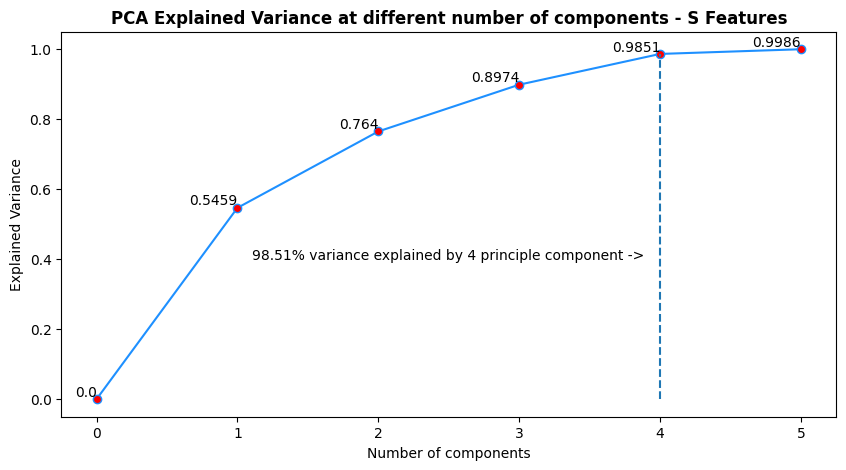

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("PCA Explained Variance at different number of components - S Features", fontweight="bold")
ax.plot(n_components, sum_explained_variance, marker="o", color="#1E90FF", markerfacecolor="red")
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained Variance")

for n_comp, marker_txt in enumerate(sum_explained_variance):
    ax.text(n_comp, marker_txt, f"{round(marker_txt, 4)}", horizontalalignment="right", verticalalignment="bottom")

ax.vlines(4, 0, sum_explained_variance[4], linestyles="--")
ax.text(1.1, 0.4, f"{round(sum_explained_variance[4]*100, 2)}% variance explained by 4 principle component ->")
plt.show()

### On all Features

In [84]:
n_components = []
sum_explained_variance = []

for n_component in range(len(X.columns)):
    pca = PCA(n_components=n_component)
    pca_test = pca.fit_transform(X)
    n_components.append(n_component)
    sum_explained_variance.append(np.sum(pca.explained_variance_ratio_))

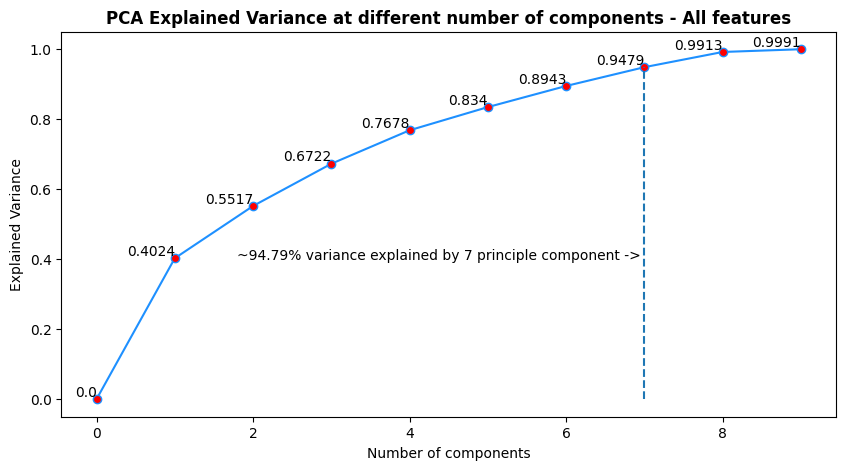

In [85]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("PCA Explained Variance at different number of components - All features", fontweight="bold")
ax.plot(n_components, sum_explained_variance, marker="o", color="#1E90FF", markerfacecolor="red")
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained Variance")

for n_comp, marker_txt in enumerate(sum_explained_variance):
    ax.text(n_comp, marker_txt, f"{round(marker_txt, 4)}", horizontalalignment="right", verticalalignment="bottom")

ax.vlines(7, 0, sum_explained_variance[7], linestyles="--")
ax.text(1.8, 0.4, f"~{round(sum_explained_variance[7]*100, 2)}% variance explained by 7 principle component ->")
plt.show()

## Findings

* Four principal components account for 98.51% of the variance in the S features.
* When considering all features, a decomposition into seven principal components explains 94.79% of the total variance.

Next step:
* Evaluate the performance of Linear, Lasso and Ridge Regression on PCA/without PCA dataset (5 fold cross-validation)

## Linear Regression

### Without decomposition with PCA

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

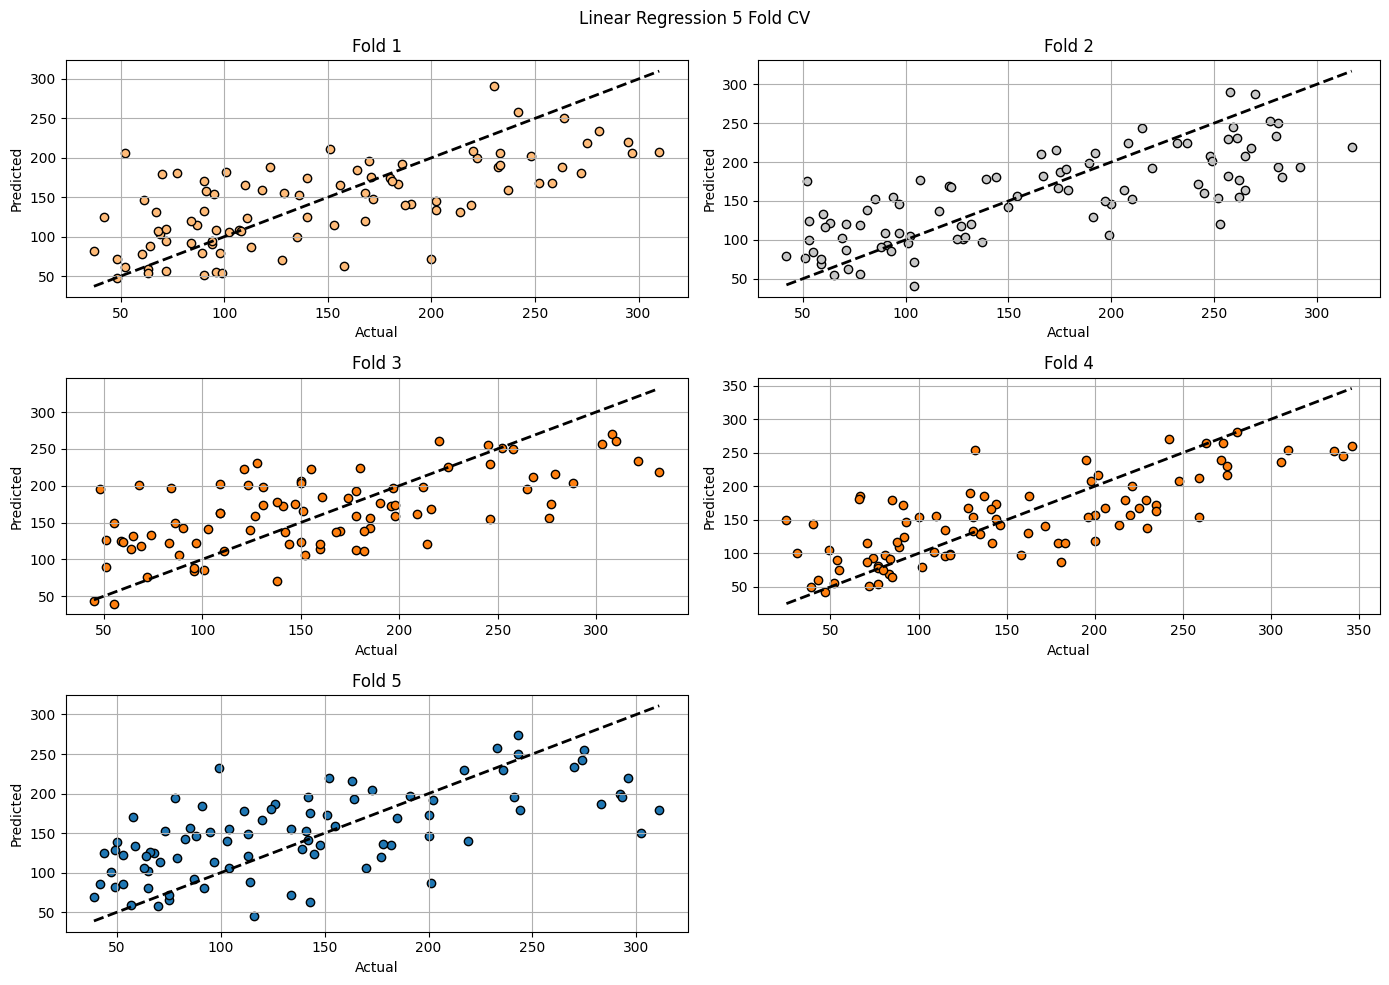

In [87]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    lr_model = LinearRegression()
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)
    
plt.suptitle("Linear Regression 5 Fold CV")
plt.tight_layout()
plt.show()

In [88]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3015.3816942872704
Root mean Squared Error Avg: 54.84894090589965
Mean Abs Error Avg: 44.269746335379594
Mean Abs Pct Error Avg: 0.3953915897744193
R2 Scores Avg: 0.3953915897744193


### With PCA on all Features

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
pca_transformer = PCA(n_components=7)
X_pca = pca_transformer.fit_transform(X)

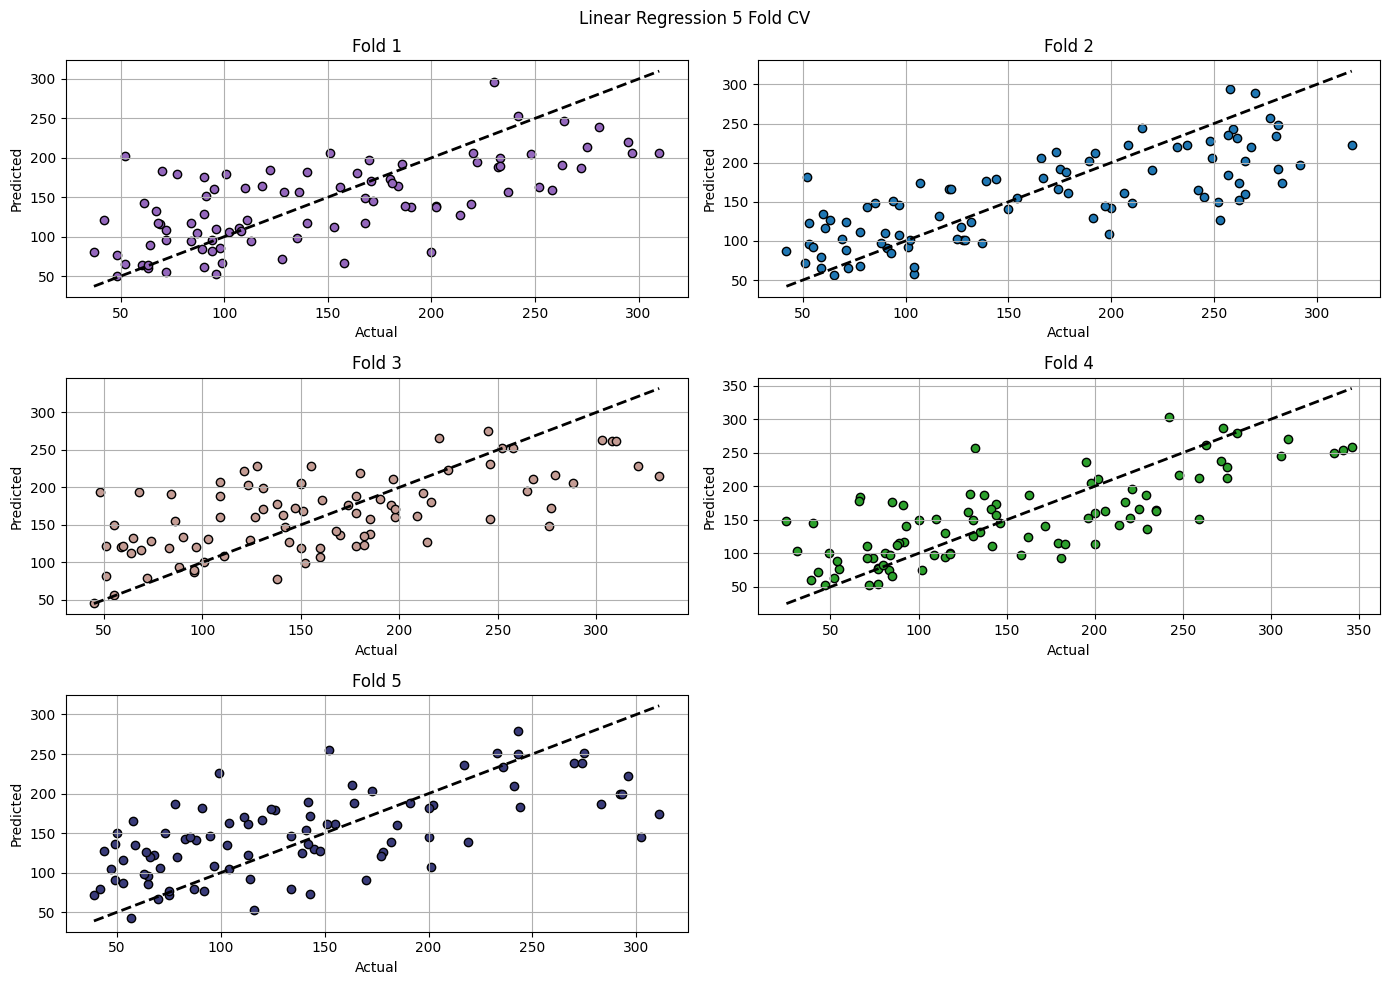

In [91]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X_pca)):
    lr_model = LinearRegression()
    
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)
    
plt.suptitle("Linear Regression 5 Fold CV")
plt.tight_layout()
plt.show()

In [92]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3000.1855562653
Root mean Squared Error Avg: 54.72438586761982
Mean Abs Error Avg: 44.00442701361823
Mean Abs Pct Error Avg: 0.39235634093328653
R2 Scores Avg: 0.39235634093328653


### With PCA on S features

In [93]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [94]:
pca_transformer = PCA(n_components=4)

X_pca_s = X.iloc[:, :-6].to_numpy()
X_pca_s = np.concatenate([X_pca_s, pca_transformer.fit_transform(X.iloc[:, -6:])], axis=1)

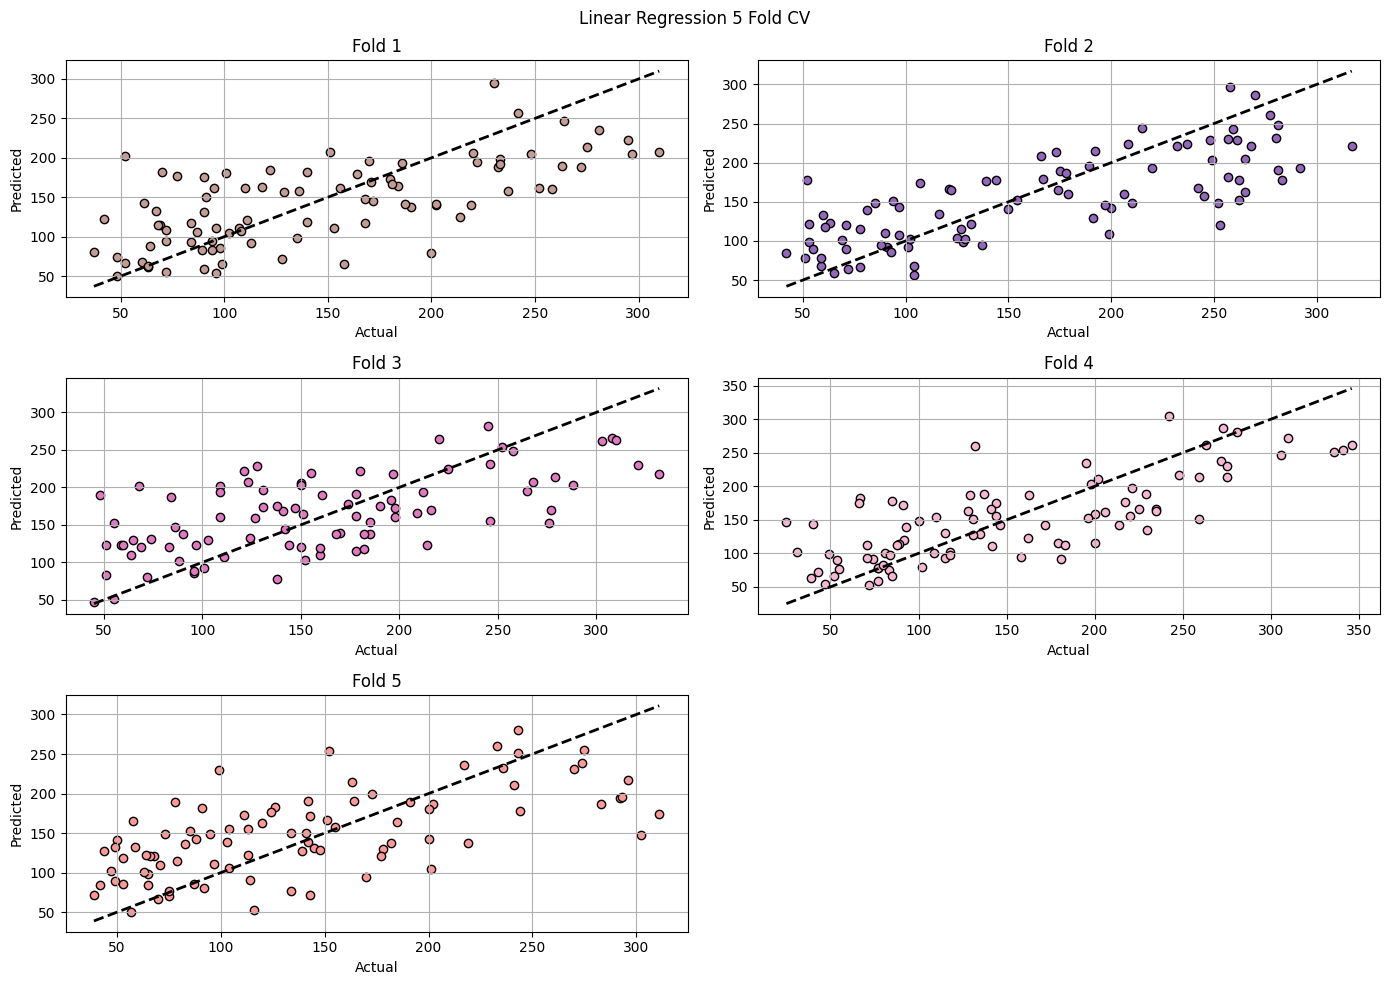

In [95]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X_pca_s)):
    lr_model = LinearRegression()
    
    X_train, X_test = X_pca_s[train_index], X_pca_s[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)
    
plt.suptitle("Linear Regression 5 Fold CV")
plt.tight_layout()
plt.show()

In [96]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3003.573017125966
Root mean Squared Error Avg: 54.74827617757003
Mean Abs Error Avg: 44.16582911593895
Mean Abs Pct Error Avg: 0.39281895203821116
R2 Scores Avg: 0.39281895203821116


## Lasso Regression

### Without decomposition with PCA

In [97]:
lasso_cv = LassoCV(n_alphas=100, cv=5, random_state=42)

In [98]:
lasso_cv.fit(X, y)

LassoCV(cv=5, random_state=42)

In [99]:
print(f"LassoCV R2 Score: {lasso_cv.score(X, y)}")
print(f"LassoCV best alpha: {lasso_cv.alpha_}")

LassoCV R2 Score: 0.5174210668198782
LassoCV best alpha: 4.869141078923005e-05


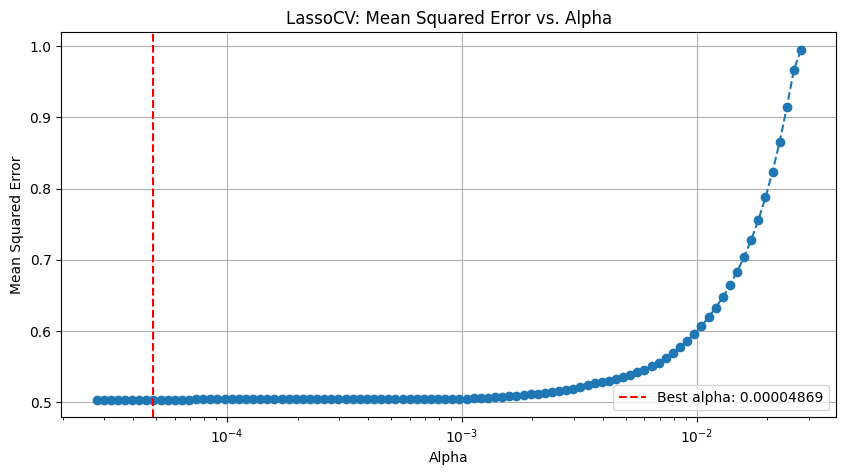

In [100]:
fig, ax = plt.subplots(figsize=(10, 5))
mean_mse = np.mean(lasso_cv.mse_path_, axis=1)

ax.plot(lasso_cv.alphas_, mean_mse, marker='o', linestyle='--')
ax.axvline(lasso_cv.alpha_, linestyle='--', color='red', label=f'Best alpha: {lasso_cv.alpha_:.8f}')
ax.set_xscale('log')

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')
ax.set_title('LassoCV: Mean Squared Error vs. Alpha')
ax.legend()
ax.grid(True)

plt.show()

In [101]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

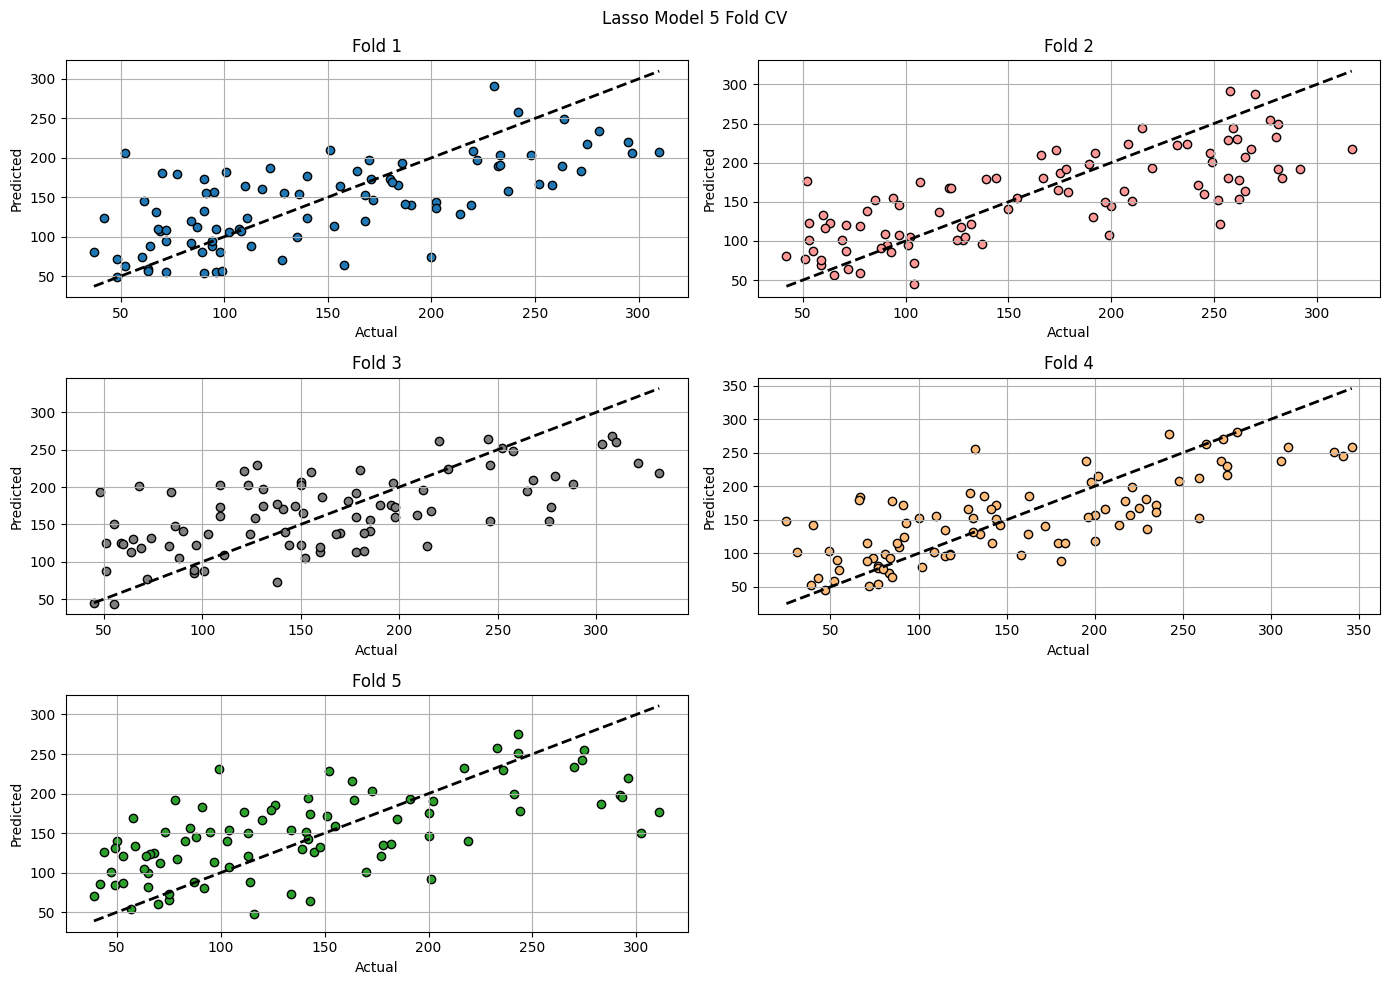

In [102]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    lasso_model = Lasso(alpha=lasso_cv.alpha_)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)

plt.suptitle("Lasso Model 5 Fold CV")
plt.tight_layout()
plt.show()

In [103]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3010.0791189661236
Root mean Squared Error Avg: 54.80446163851549
Mean Abs Error Avg: 44.22991233067563
Mean Abs Pct Error Avg: 0.39443543064728687
R2 Scores Avg: 0.39443543064728687


### With PCA on all Features

In [104]:
pca_transformer = PCA(n_components=7)
X_pca = pca_transformer.fit_transform(X)

In [105]:
lasso_cv = LassoCV(n_alphas=100, cv=5, random_state=42)

In [106]:
lasso_cv.fit(X_pca, y)

LassoCV(cv=5, random_state=42)

In [107]:
print(f"LassoCV R2 Score: {lasso_cv.score(X_pca, y)}")
print(f"LassoCV best alpha: {lasso_cv.alpha_}")

LassoCV R2 Score: 0.5123568270147745
LassoCV best alpha: 0.0004004037672031171


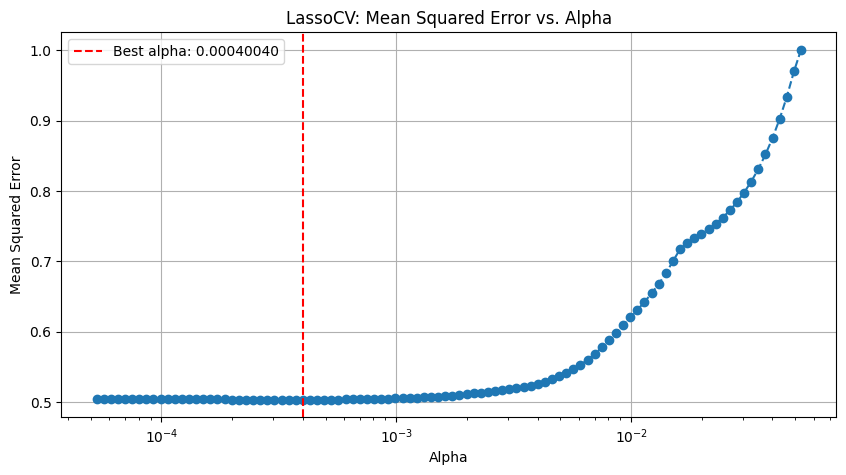

In [108]:
fig, ax = plt.subplots(figsize=(10, 5))
mean_mse = np.mean(lasso_cv.mse_path_, axis=1)

ax.plot(lasso_cv.alphas_, mean_mse, marker='o', linestyle='--')
ax.axvline(lasso_cv.alpha_, linestyle='--', color='red', label=f'Best alpha: {lasso_cv.alpha_:.8f}')
ax.set_xscale('log')

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')
ax.set_title('LassoCV: Mean Squared Error vs. Alpha')
ax.legend()
ax.grid(True)

plt.show()

In [109]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

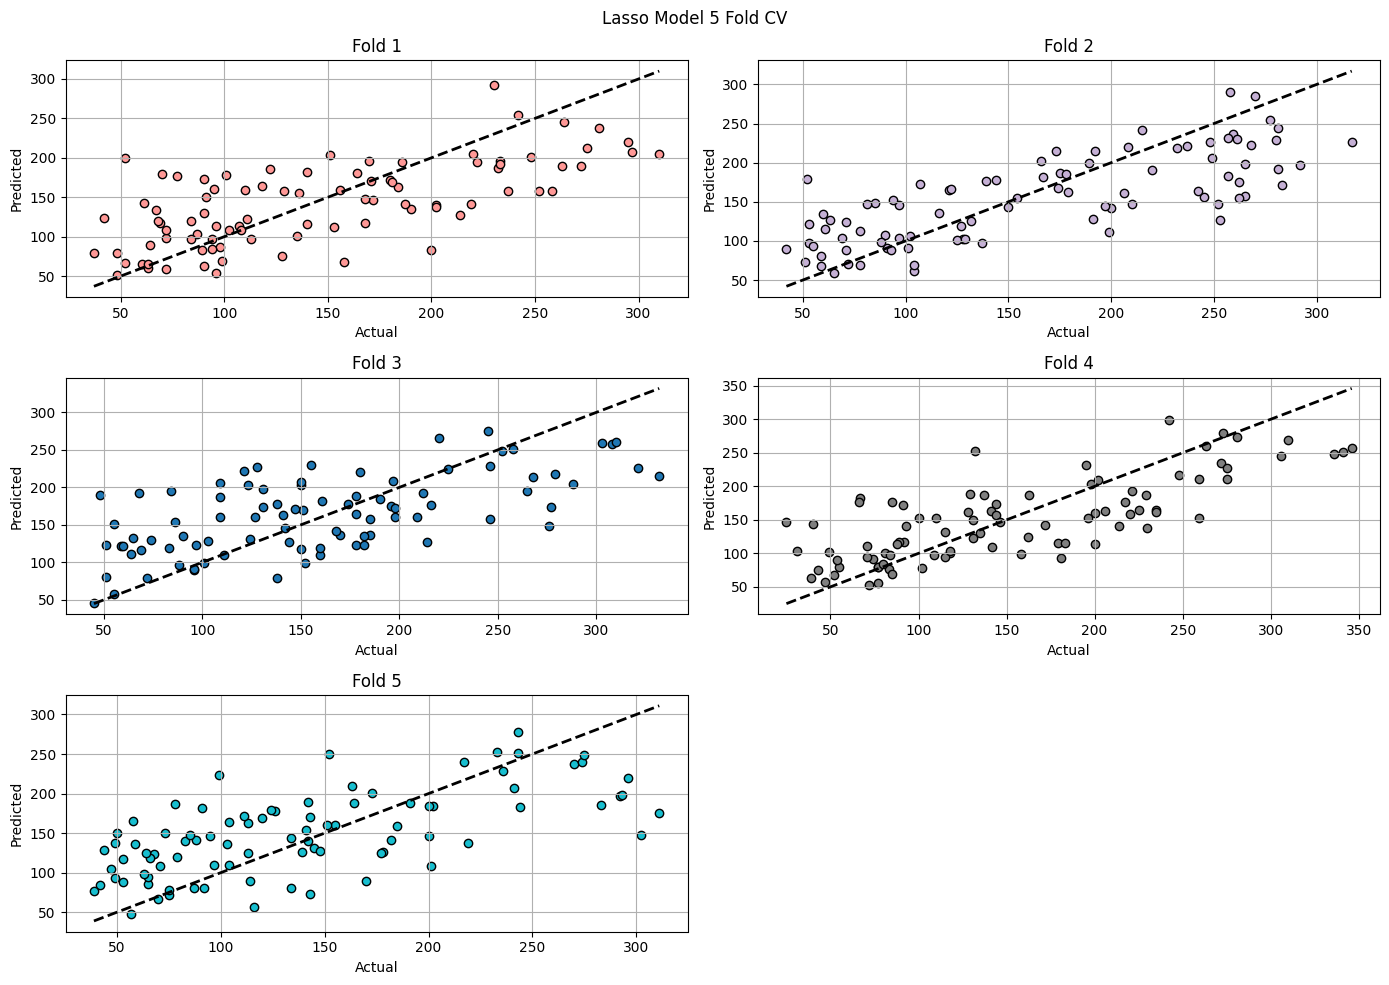

In [110]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X_pca)):
    lasso_model = Lasso(alpha=lasso_cv.alpha_)
    
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)
    
plt.suptitle("Lasso Model 5 Fold CV")
plt.tight_layout()
plt.show()

In [111]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 2990.8893016540105
Root mean Squared Error Avg: 54.63801502274705
Mean Abs Error Avg: 44.07328731019047
Mean Abs Pct Error Avg: 0.3937103137468855
R2 Scores Avg: 0.3937103137468855


### With PCA on S features

In [112]:
pca_transformer = PCA(n_components=4)

X_pca_s = X.iloc[:, :-6].to_numpy()
X_pca_s = np.concatenate([X_pca_s, pca_transformer.fit_transform(X.iloc[:, -6:])], axis=1)

In [113]:
lasso_cv = LassoCV(n_alphas=100, cv=5, random_state=42)

In [114]:
lasso_cv.fit(X_pca_s, y)

LassoCV(cv=5, random_state=42)

In [115]:
print(f"LassoCV R2 Score: {lasso_cv.score(X_pca_s, y)}")
print(f"LassoCV best alpha: {lasso_cv.alpha_}")

LassoCV R2 Score: 0.5130377707779263
LassoCV best alpha: 0.0005058203299888315


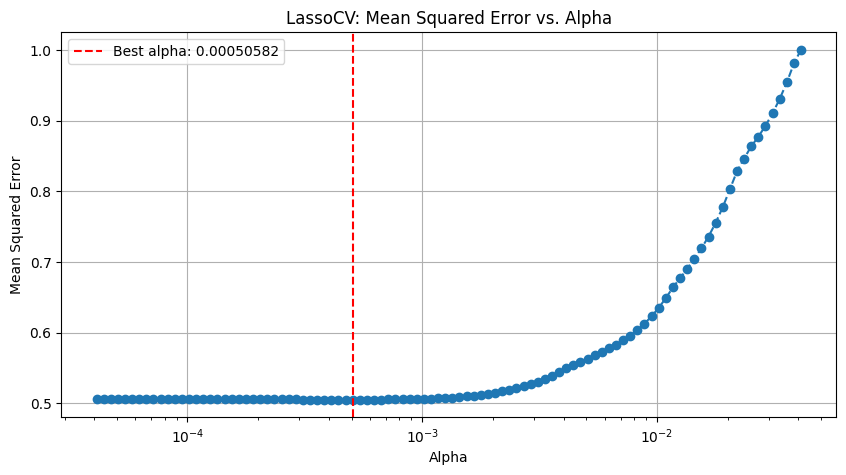

In [116]:
fig, ax = plt.subplots(figsize=(10, 5))
mean_mse = np.mean(lasso_cv.mse_path_, axis=1)

ax.plot(lasso_cv.alphas_, mean_mse, marker='o', linestyle='--')
ax.axvline(lasso_cv.alpha_, linestyle='--', color='red', label=f'Best alpha: {lasso_cv.alpha_:.8f}')
ax.set_xscale('log')

ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')
ax.set_title('LassoCV: Mean Squared Error vs. Alpha')
ax.legend()
ax.grid(True)

plt.show()

In [117]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

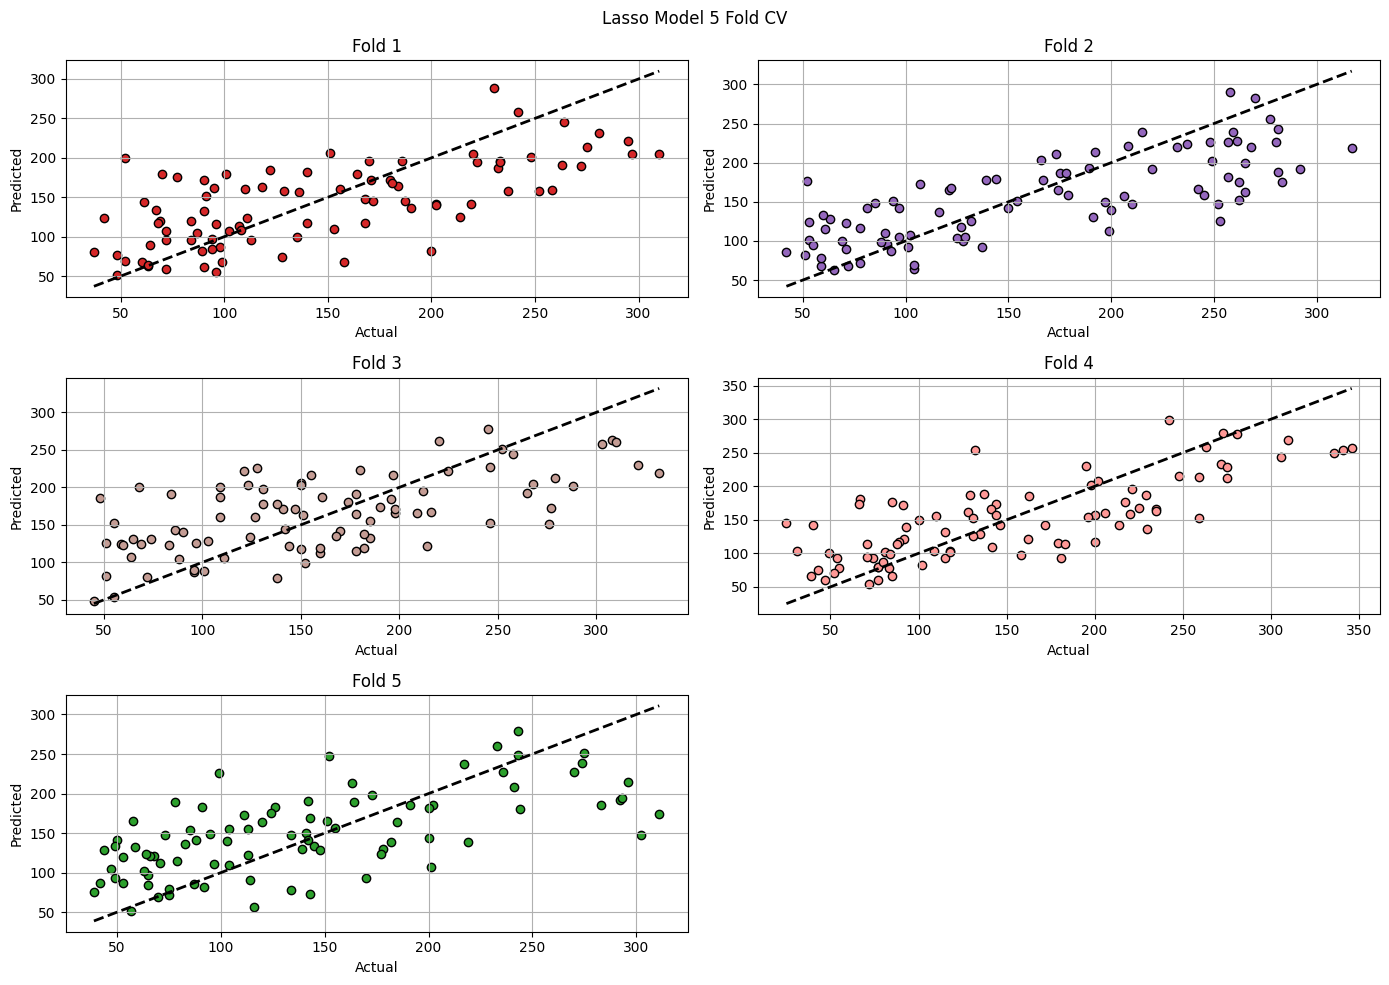

In [118]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X_pca_s)):
    lasso_model = Lasso(alpha=lasso_cv.alpha_)
    
    X_train, X_test = X_pca_s[train_index], X_pca_s[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)
    
plt.suptitle("Lasso Model 5 Fold CV")
plt.tight_layout()
plt.show()

In [119]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3000.441081800597
Root mean Squared Error Avg: 54.72053105587903
Mean Abs Error Avg: 44.31502324804946
Mean Abs Pct Error Avg: 0.39532255691669416
R2 Scores Avg: 0.39532255691669416


## Ridge Regression

### Without decomposition with PCA

In [120]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 3, 5, 10], cv=5).fit(X, y)

In [121]:
print(f"RidgeCV R2 Score: {ridge_cv.score(X, y)}")
print(f"RidgeCV best alpha: {ridge_cv.alpha_}")

RidgeCV R2 Score: 0.517706867733157
RidgeCV best alpha: 0.001


In [122]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

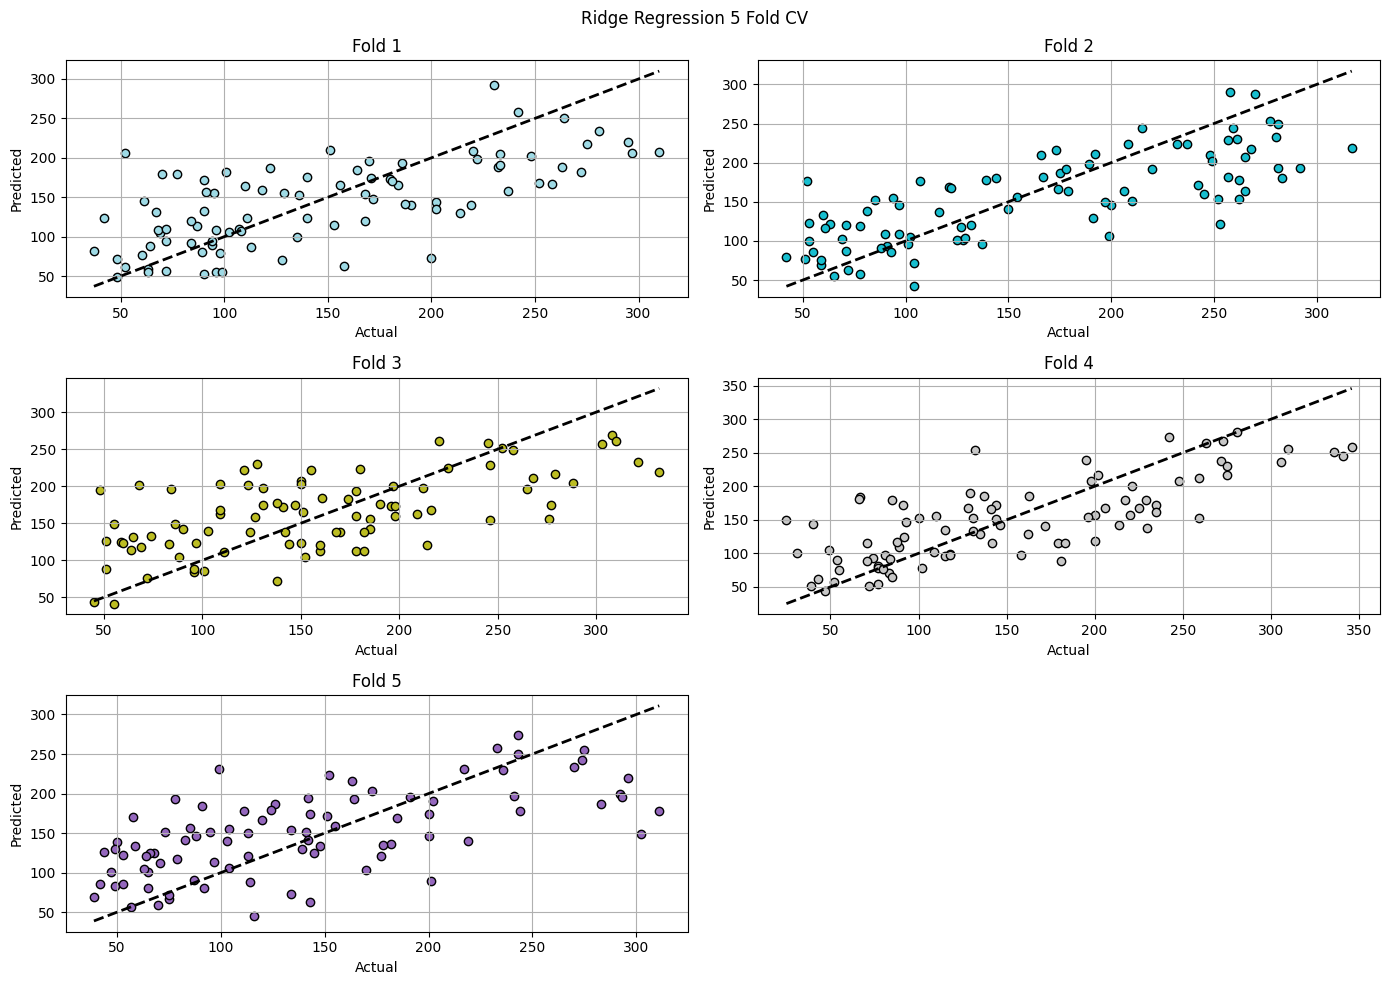

In [123]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    ridge_model = Ridge(alpha=ridge_cv.alpha_)
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)

plt.suptitle("Ridge Regression 5 Fold CV")
plt.tight_layout()
plt.show()

In [124]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3013.675800283423
Root mean Squared Error Avg: 54.835373161797975
Mean Abs Error Avg: 44.25267487545328
Mean Abs Pct Error Avg: 0.39493629123465657
R2 Scores Avg: 0.39493629123465657


### With PCA on all Features

In [125]:
pca_transformer = PCA(n_components=7)
X_pca = pca_transformer.fit_transform(X)

In [126]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 3, 5, 10], cv=5).fit(X_pca, y)

In [127]:
print(f"RidgeCV R2 Score: {ridge_cv.score(X_pca, y)}")
print(f"RidgeCV best alpha: {ridge_cv.alpha_}")

RidgeCV R2 Score: 0.512853043305275
RidgeCV best alpha: 0.01


In [128]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

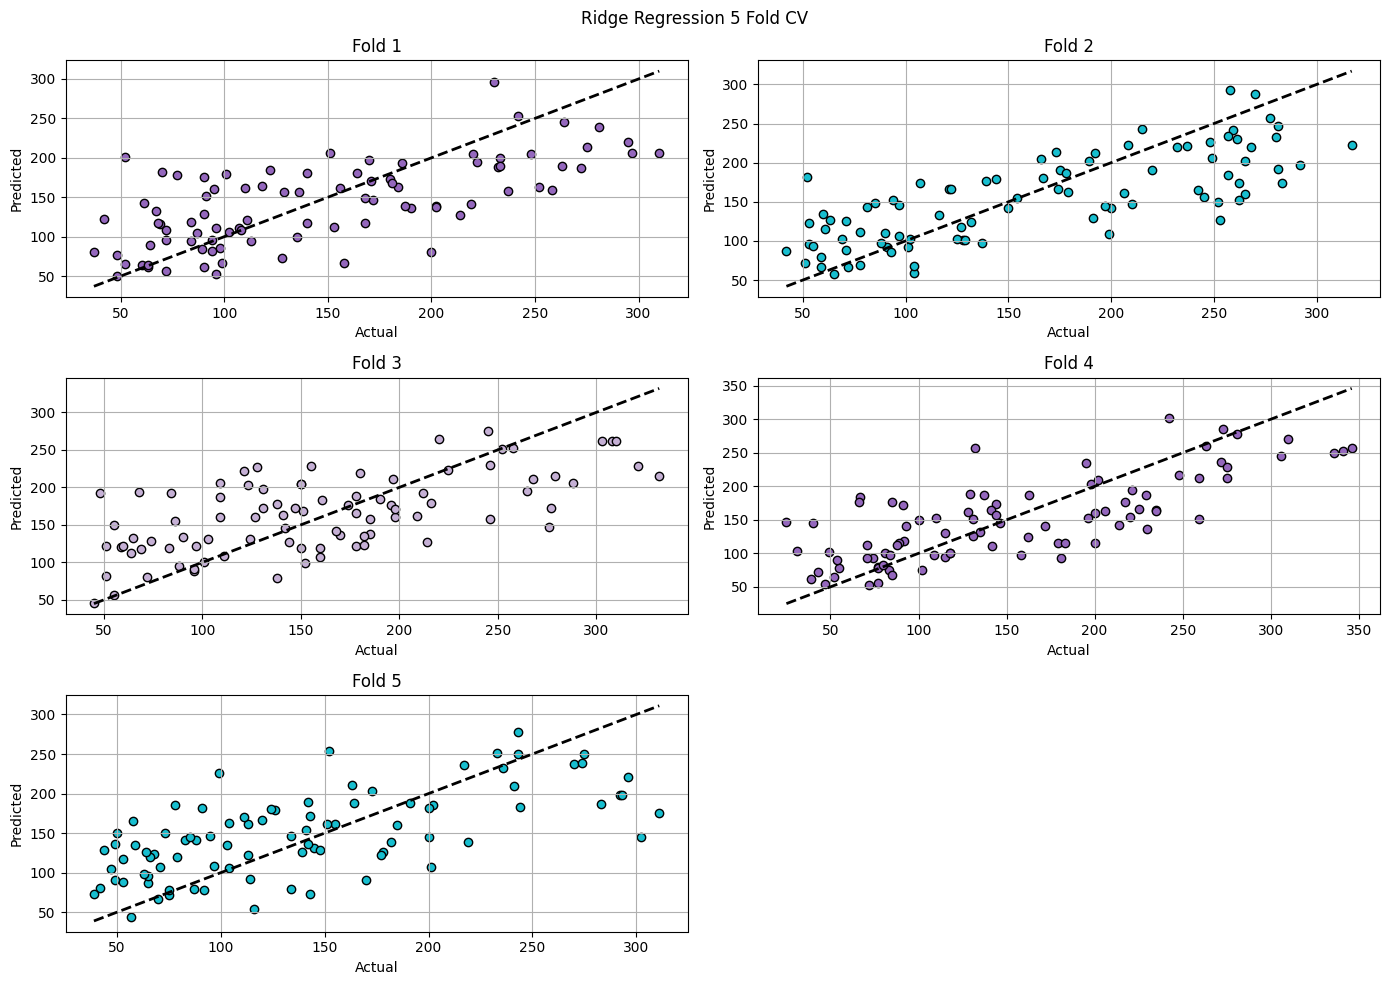

In [129]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X_pca)):
    ridge_model = Ridge(alpha=ridge_cv.alpha_)
    
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)

plt.suptitle("Ridge Regression 5 Fold CV")
plt.tight_layout()
plt.show()

In [130]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 2998.7280581756822
Root mean Squared Error Avg: 54.71076381240732
Mean Abs Error Avg: 44.03077000080627
Mean Abs Pct Error Avg: 0.3928891576681503
R2 Scores Avg: 0.3928891576681503


### With PCA on S Features

In [131]:
pca_transformer = PCA(n_components=4)

X_pca_s = X.iloc[:, :-6].to_numpy()
X_pca_s = np.concatenate([X_pca_s, pca_transformer.fit_transform(X.iloc[:, -6:])], axis=1)

In [132]:
ridge_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 3, 5, 10], cv=5).fit(X_pca_s, y)

In [133]:
print(f"RidgeCV R2 Score: {ridge_cv.score(X_pca_s, y)}")
print(f"RidgeCV best alpha: {ridge_cv.alpha_}")

RidgeCV R2 Score: 0.5137243586123349
RidgeCV best alpha: 0.01


In [134]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

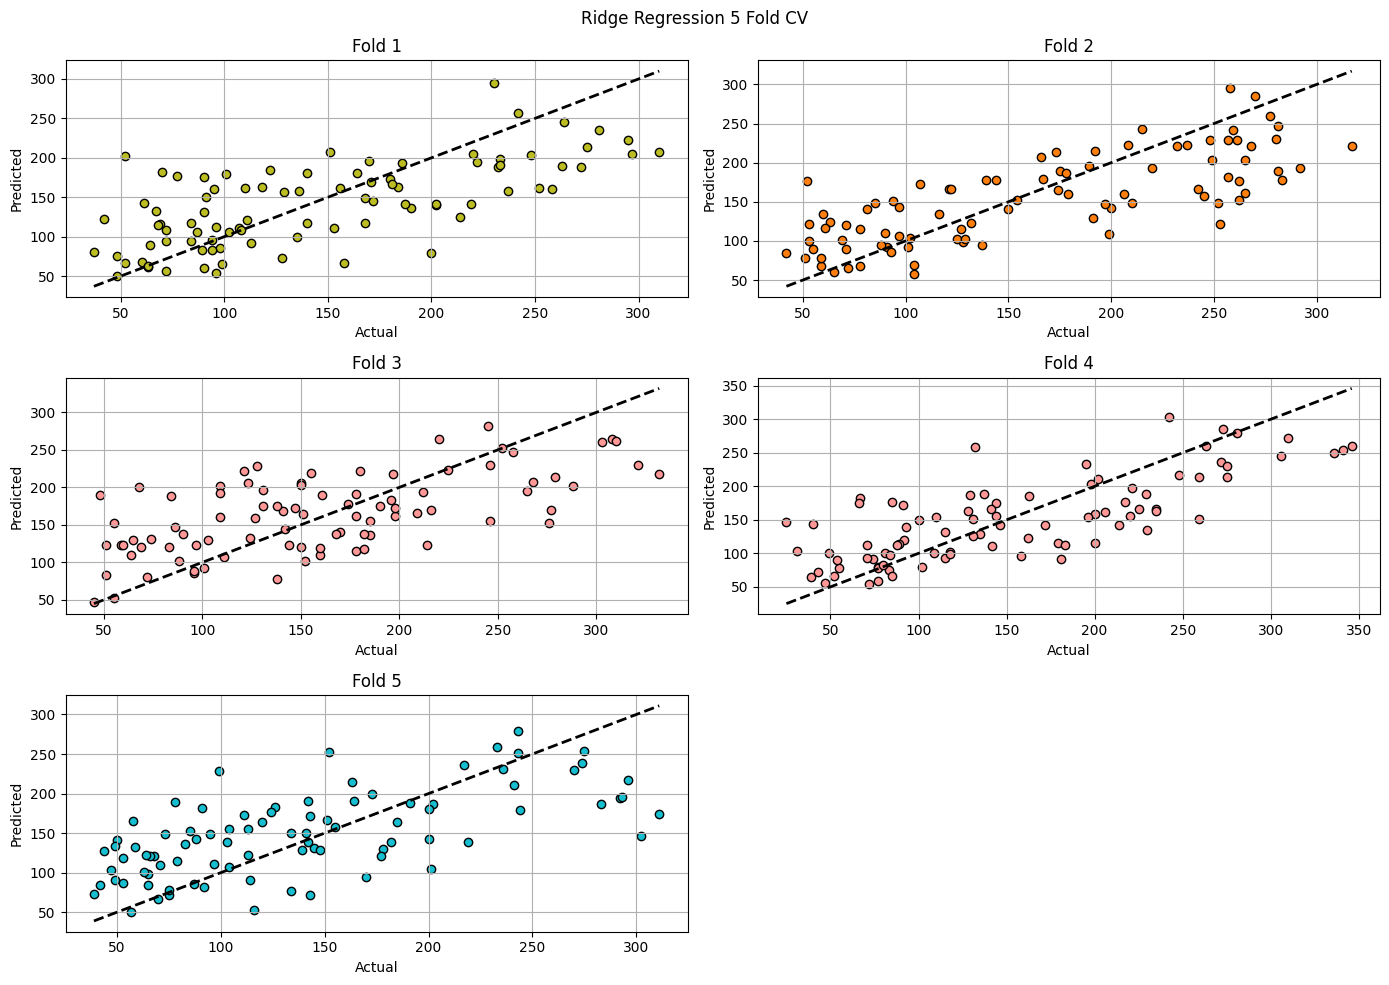

In [135]:
mse_scores = []
rmse_scores = []
mape_scores = []
mae_scores = []
r2_scores = []

plt.figure(figsize=(14, 10))

for fold, (train_index, test_index) in enumerate(kf.split(X_pca_s)):
    ridge_model = Ridge(alpha=ridge_cv.alpha_)
    
    X_train, X_test = X_pca_s[train_index], X_pca_s[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    y_test_inv_transf = (y_test * df_target_std) + df_target_mean
    y_pred_inv_trans = (y_pred * df_target_std) + df_target_mean

    mse_scores.append(mean_squared_error(y_test_inv_transf, y_pred_inv_trans))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_inv_transf, y_pred_inv_trans)))
    mape_scores.append(mean_absolute_percentage_error(y_test_inv_transf, y_pred_inv_trans))
    mae_scores.append(mean_absolute_error(y_test_inv_transf, y_pred_inv_trans))
    r2_scores.append(r2_score(y_test_inv_transf, y_pred_inv_trans))

    plt.subplot(3, 2, fold + 1)
    plt.scatter(y_test_inv_transf, y_pred_inv_trans, edgecolors=(0, 0, 0), c=random.choice(colors_collection))
    plt.plot([y_test_inv_transf.min(), y_test_inv_transf.max()], 
             [y_test_inv_transf.min(), y_test_inv_transf.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold + 1}')
    plt.grid(True)

plt.suptitle("Ridge Regression 5 Fold CV")
plt.tight_layout()
plt.show()

In [136]:
print("Five Fold results")
print(f"Mean Squared Error Avg: {np.mean(mse_scores)}")
print(f"Root mean Squared Error Avg: {np.mean(rmse_scores)}")
print(f"Mean Abs Error Avg: {np.mean(mae_scores)}")
print(f"Mean Abs Pct Error Avg: {np.mean(mape_scores)}")
print(f"R2 Scores Avg: {np.mean(mape_scores)}")

Five Fold results
Mean Squared Error Avg: 3001.9992696859395
Root mean Squared Error Avg: 54.73369052667427
Mean Abs Error Avg: 44.18367492535905
Mean Abs Pct Error Avg: 0.39327639339001014
R2 Scores Avg: 0.39327639339001014


# Summary

### The journey of applying PCA and Linear Regression to a real-world diabetes dataset was insightful and rewarding.

* **Achieved performance metrics on 5-fold cross-validation:**
    * **Mean Squared Error (MSE):** approximately 3000
    * **Root Mean Squared Error (RMSE):** 54.63
    * **Mean Absolute Error (MAE):** 44.18
    * **Mean Absolute Percentage Error (MAPE) and R² Score:** 0.393
    
* **Notably, employing Decision Tree or Gradient Boosting algorithms would provide better results.**
* **Due to the limited sample size, the model struggled to capture all variations and features.**